# 9.6 Lab Support Vector Machine

In [2]:
! pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.

In [3]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [4]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [5]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

## 9.6.1 Support Vector Machine

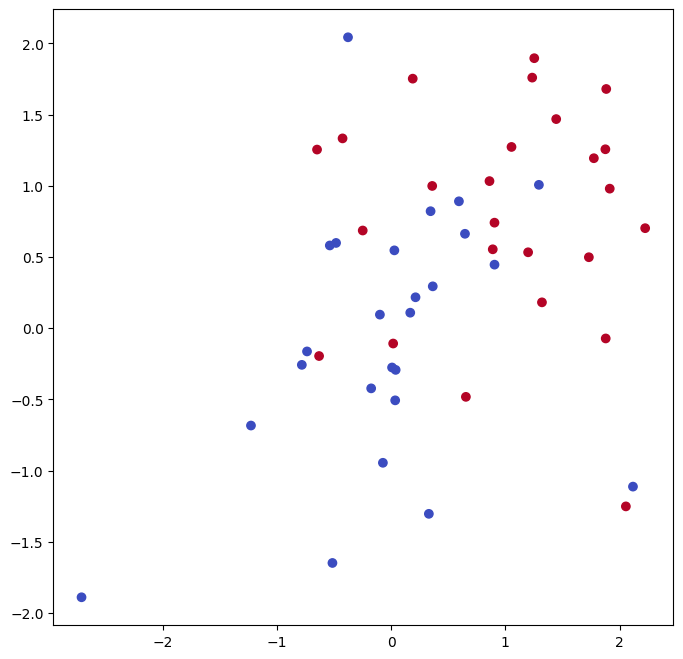

In [13]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25 + [1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [15]:
svm_linear = SVC(C = 10, kernel = 'linear').fit(X,y)

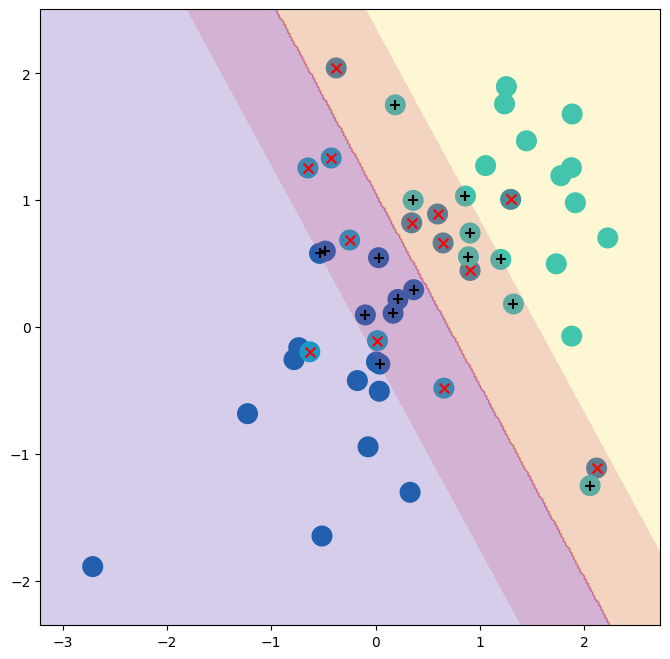

In [16]:
fig, ax = subplots(figsize = (8,8))
plot_svm(X,y,svm_linear, ax = ax)

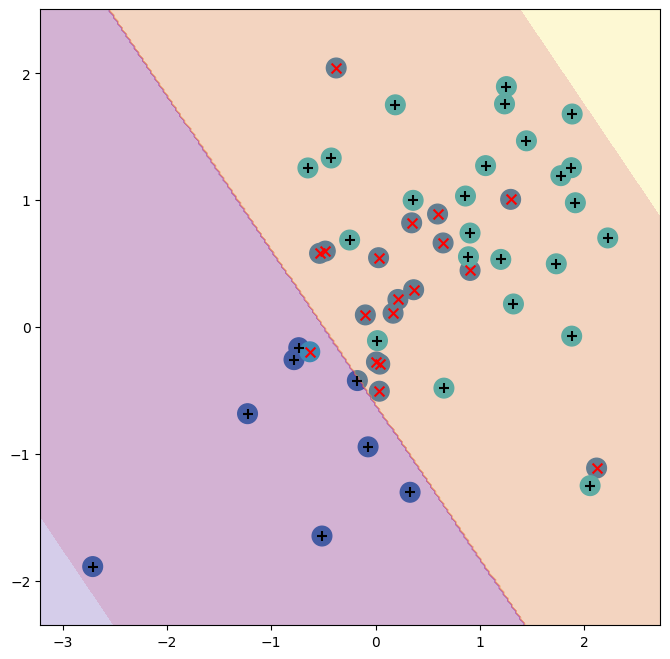

In [17]:
svm_linear_small = SVC(C= 0.01, kernel = 'linear').fit(X,y)
fig, ax = subplots(figsize = (8,8))
plot_svm(X,y,svm_linear_small, ax = ax)

In [18]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [19]:
kfold = skm.KFold(n_splits = 5, random_state = 0, shuffle = True)
grid = skm.GridSearchCV(svm_linear, {'C': [.001,.01,.1,1,5,10, 100]}, refit = True, cv = kfold, scoring = 'accuracy')
grid.fit(X,y)
grid.best_params_

{'C': 1}

In [20]:
grid.cv_results_

{'mean_fit_time': array([0.00230846, 0.00179715, 0.00115228, 0.00123239, 0.00124054,
        0.00148988, 0.00242009]),
 'std_fit_time': array([1.32488437e-03, 9.84467497e-04, 2.03587913e-04, 5.55356662e-05,
        4.00984045e-05, 2.36855773e-04, 8.88892105e-04]),
 'mean_score_time': array([0.0009706 , 0.00101504, 0.00079403, 0.00084496, 0.00081048,
        0.00135455, 0.00118289]),
 'std_score_time': array([1.41655953e-04, 1.88521453e-04, 1.22010376e-04, 5.64374598e-05,
        1.38927470e-05, 6.61499720e-04, 3.89387121e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.3, 0.3, 0.8, 0.8, 0.8, 0.8, 0.8]),
 'split2_test_score': array([0.6, 0.6, 0

In [21]:
grid.cv_results_['mean_test_score']

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [22]:
X_test = rng.standard_normal((20,2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test == 1] += 1


In [23]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test, y_test_hat)

Truth,-1,1
Predicted,,
-1,8,2
1,4,6


In [24]:
svm_ = SVC(C = .001, kernel = 'linear').fit(X,y)
confusion_table(y_test, svm_.predict(X_test))

Truth,-1,1
Predicted,,
-1,2,8
1,0,10


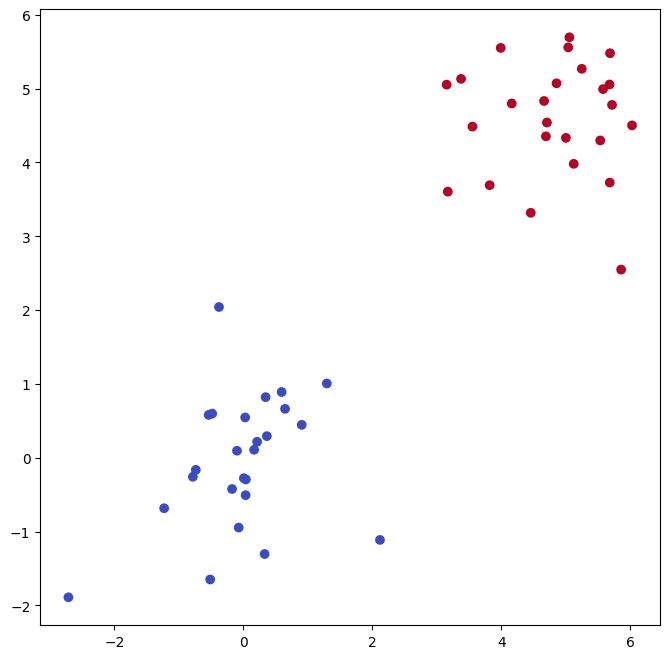

In [26]:
X[y == 1] += 1.9;
fig, ax = subplots(figsize = (8,8))
ax.scatter(X[:,0], X[:,1], c = y, cmap = cm.coolwarm)

In [27]:
svm_ = SVC(C = 1e5, kernel = 'linear').fit(X,y)
y_hat = svm_.predict(X)
confusion_table(y, y_hat)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


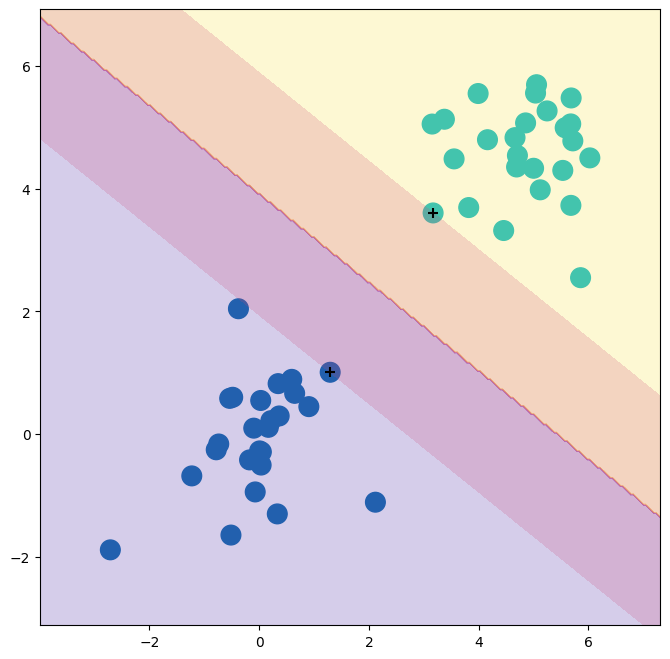

In [29]:
fig, ax = subplots(figsize = (8,8))
plot_svm(X,y,svm_, ax = ax)


In [30]:
svm_ = SVC(C = 0.1, kernel = 'linear').fit(X,y)
pred = svm_.predict(X)
confusion_table(y, pred)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


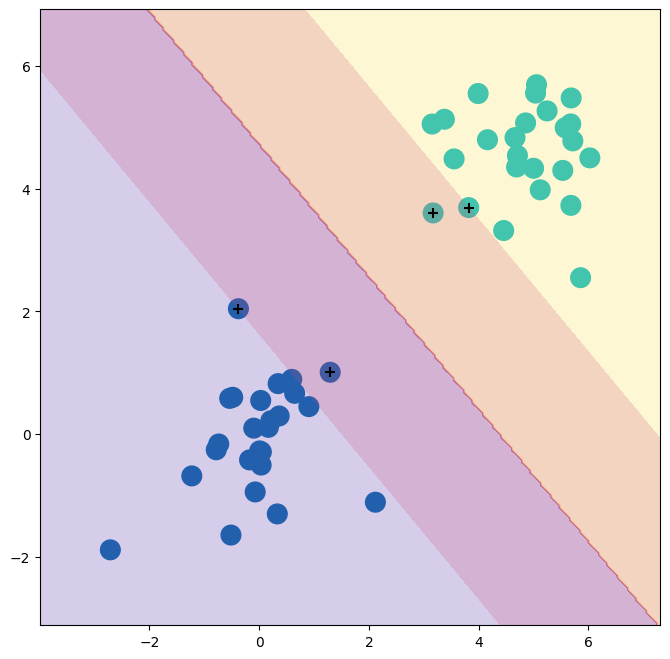

In [31]:
fig, ax = subplots(figsize = (8,8))
plot_svm(X,y,svm_ , ax =ax)

## 9.6.2 Support Vector Machine

In [35]:
X = rng.standard_normal((200,2))
X[:100 ]+= 2
X[100:150] -= 2
y = np.array([1] * 150 + [2] * 50)


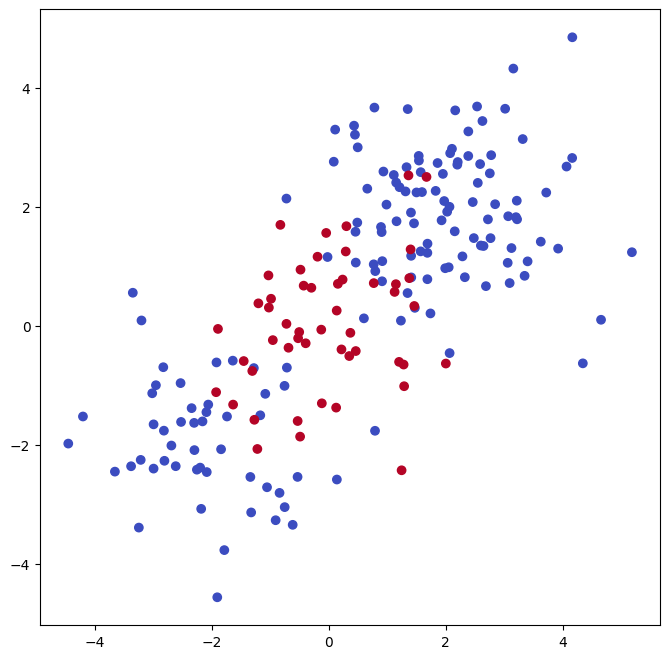

In [38]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(X[:,0], X[:,1], c =y, cmap = cm.coolwarm)

In [39]:
(X_train,X_test,y_train,y_test) = skm.train_test_split(X,y,test_size=0.5,random_state=0)

In [41]:
svm_rbf = SVC(C = 1, gamma = 1, kernel = 'rbf').fit(X_train, y_train)


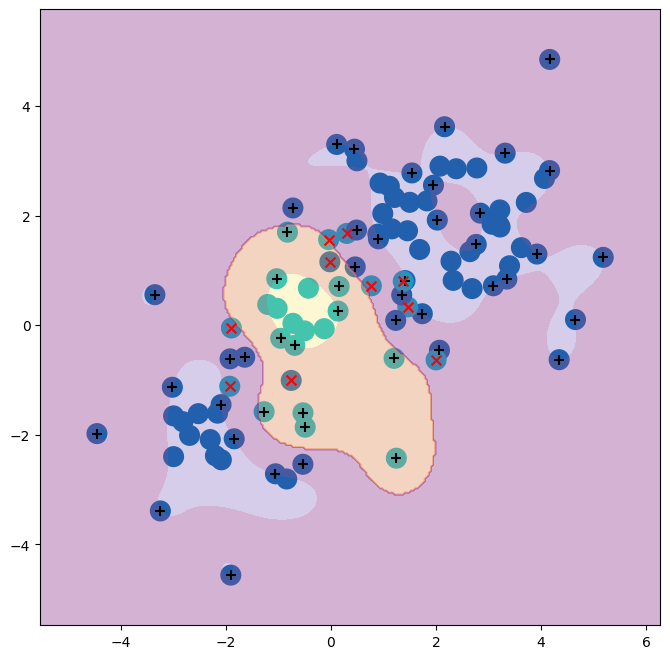

In [43]:
fig, ax = subplots(figsize = (8,8))
plot_svm(X_train, y_train, svm_rbf, ax = ax)

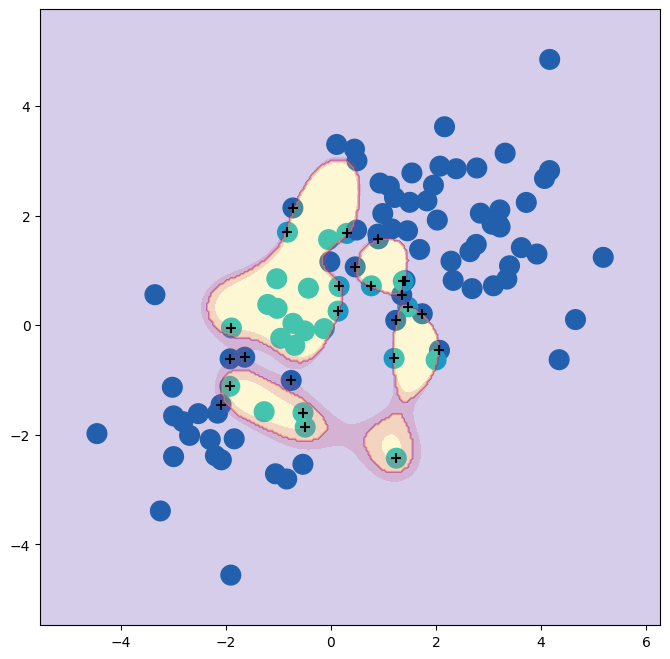

In [45]:
svm_rbf = SVC(C = 1e5, gamma = 1, kernel = 'rbf').fit(X_train, y_train)
fig, ax = subplots(figsize = (8,8))
plot_svm(X_train , y_train , svm_rbf, ax = ax)

In [46]:
kfold = skm.KFold(n_splits = 5, random_state = 0, shuffle = True)
grid = skm.GridSearchCV(svm_rbf, {'C': [0.1, 1, 10, 100, 1000],
                                  'gamma': [0.5, 1, 2, 3, 4]},
                        refit = True, cv = kfold, scoring = 'accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 3}

In [47]:
grid.cv_results_

{'mean_fit_time': array([0.00173268, 0.0016325 , 0.00168633, 0.00184035, 0.00183988,
        0.00157609, 0.00169086, 0.00203257, 0.00173001, 0.00193329,
        0.00166869, 0.00159812, 0.00186148, 0.00177426, 0.00421648,
        0.00173268, 0.00164719, 0.00186462, 0.0019073 , 0.00200167,
        0.00271163, 0.00303478, 0.00258479, 0.0020576 , 0.00261102]),
 'std_fit_time': array([1.73683351e-04, 1.04675412e-04, 3.75162070e-05, 6.64059732e-05,
        1.15179914e-04, 2.77360235e-05, 2.09420290e-04, 5.21462571e-04,
        5.22615266e-05, 2.46564947e-04, 1.09538847e-04, 3.41616470e-05,
        1.17000584e-04, 9.89641490e-05, 3.14402973e-03, 1.15975933e-04,
        1.34105345e-04, 1.45282462e-04, 1.38009508e-04, 1.42421816e-04,
        4.41251941e-04, 2.13046416e-03, 1.37296305e-03, 1.47862382e-04,
        1.23838584e-03]),
 'mean_score_time': array([0.00118461, 0.00114827, 0.00114145, 0.00120778, 0.00119653,
        0.0011127 , 0.00112829, 0.0011826 , 0.00113249, 0.00115962,
        0.00

Truth       1   2
Predicted        
1          74   1
2          15  10


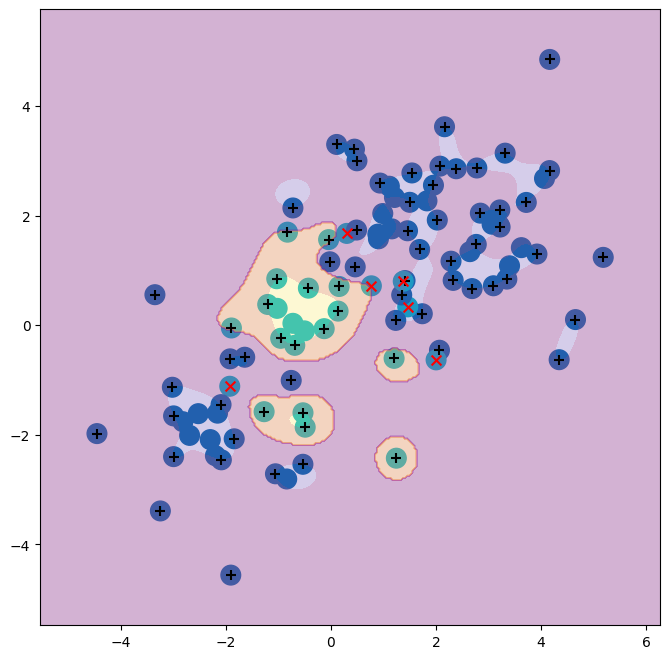

In [50]:
best_svm = grid.best_estimator_
pred = best_svm.predict(X_test)
print(confusion_table(y_test, pred))
fig, ax = subplots(figsize = (8,8))
plot_svm(X_train ,y_train, best_svm, ax = ax)

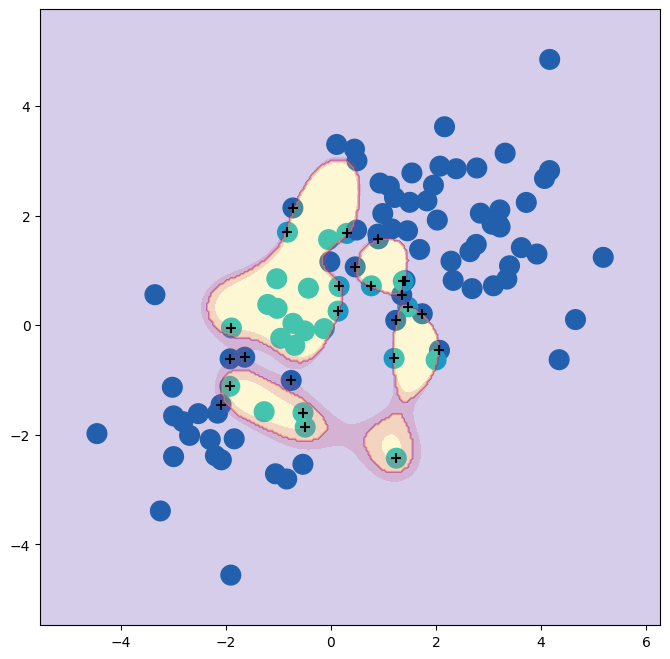

In [61]:
svm_rbf_ = SVC(C = 100000, gamma = 1, kernel = 'rbf').fit(X_train, y_train)
fig, ax = subplots(figsize = (8,8))
plot_svm(X_train , y_train , svm_rbf_, ax = ax)

## 9.6.3 ROC Curves

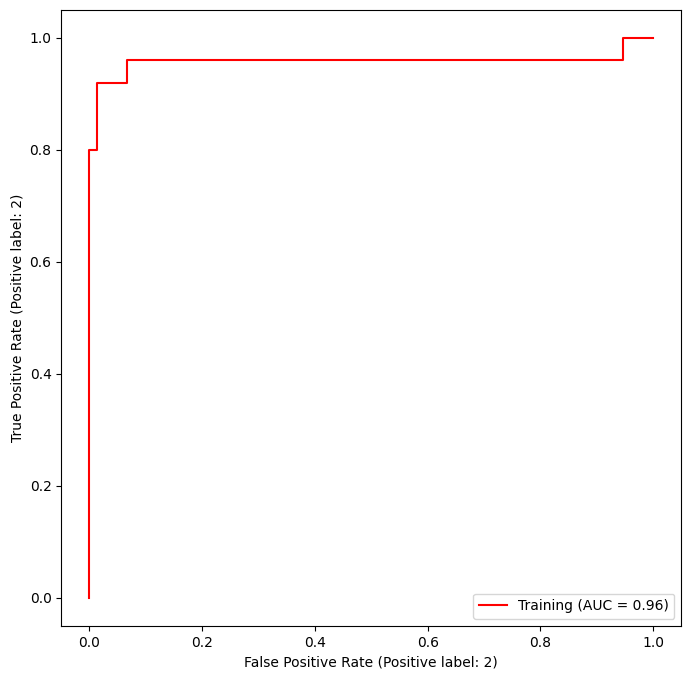

In [62]:
fig, ax = subplots(figsize = (8,8))
roc_curve(best_svm, X_train, y_train, color = 'r', ax = ax, name = 'Training')

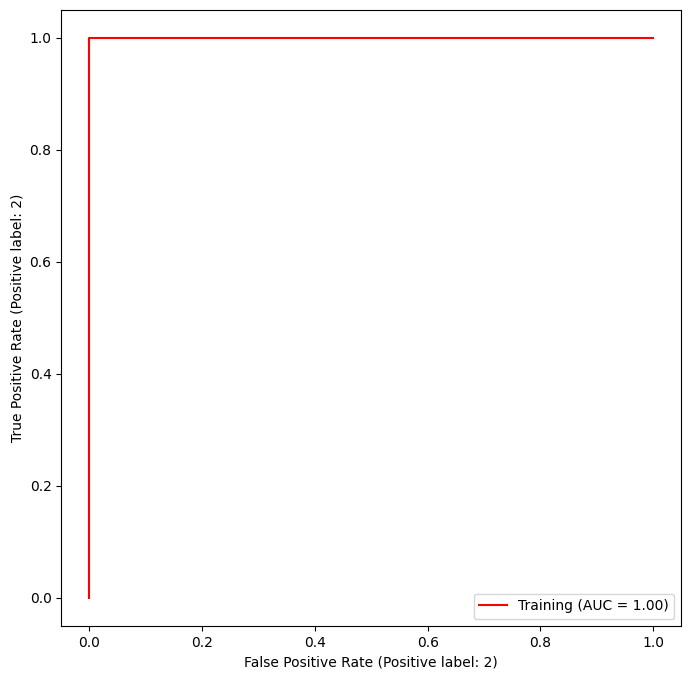

In [63]:
svm_flex = SVC(C = 1, gamma = 50, kernel = 'rbf').fit(X_train, y_train)
fig, ax = subplots(figsize = (8,8))
roc_curve(svm_flex, X_train, y_train, color = 'r', ax = ax, name = 'Training')


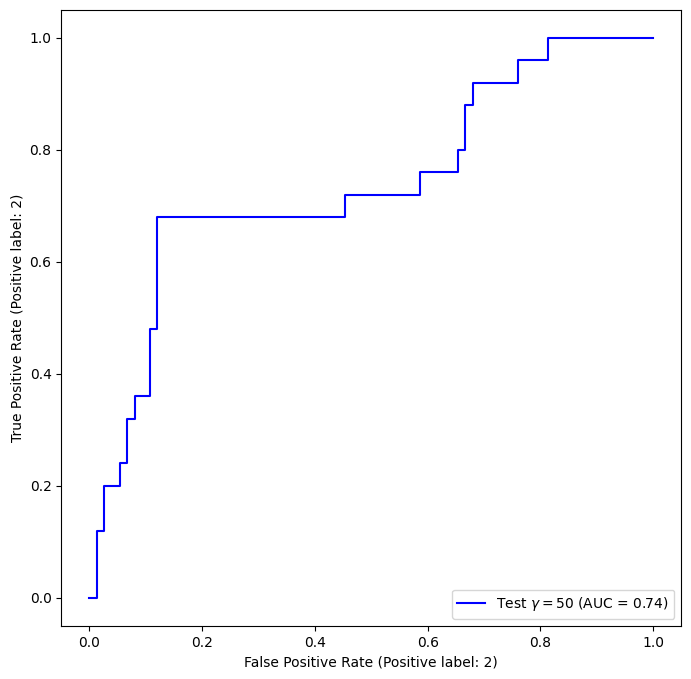

In [68]:
fig, ax = subplots(figsize = (8,8))
roc_curve(svm_flex, X_test, y_test, name='Test $\gamma=50$', color='b', ax=ax)
fig;

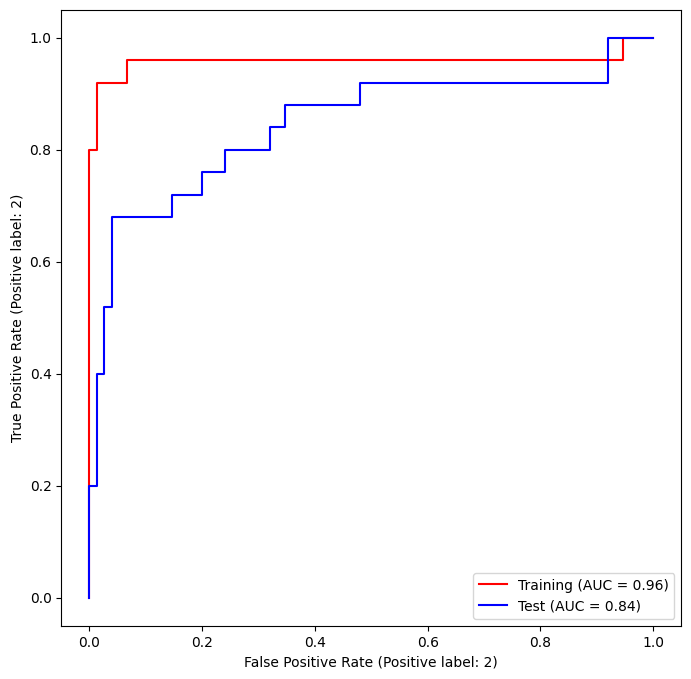

In [71]:
fig, ax = subplots(figsize = (8,8))
for (X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('Training', 'Test')):
  roc_curve(best_svm, X_, y_, color = c, ax= ax, name = name)

## 9.6.4 SVM with Muliple Classes

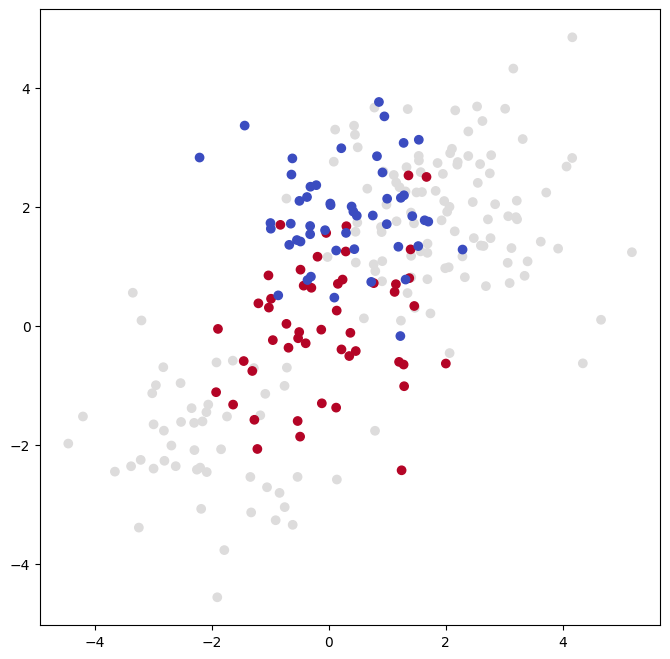

In [72]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

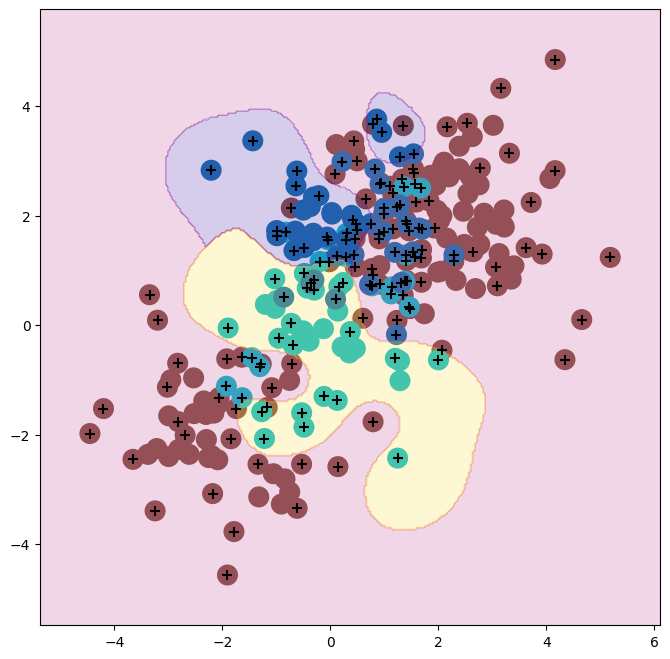

In [74]:
svm_rbf_3 = SVC(C = 10, kernel = 'rbf', gamma = 1, decision_function_shape = 'ovo').fit(X,y)
fig, ax = subplots(figsize = (8,8))
plot_svm(X, y, svm_rbf_3, scatter_cmap=cm.tab10, ax=ax)

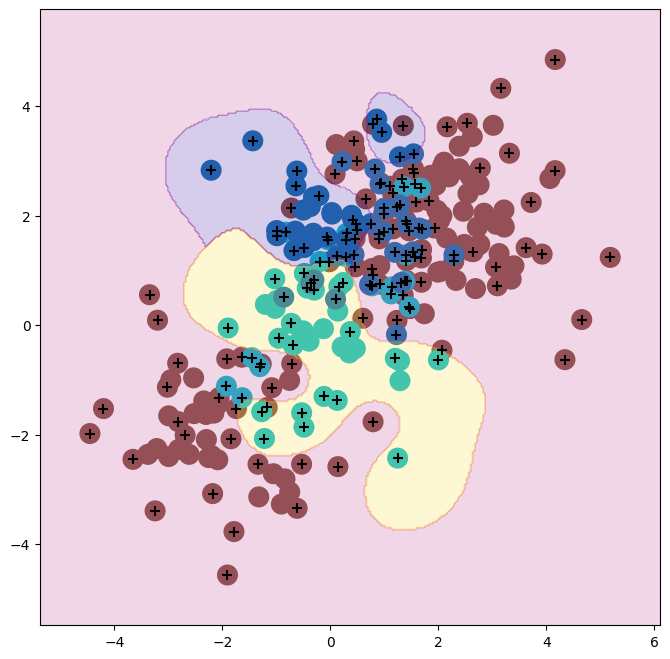

In [75]:
svm_rbf_4 = SVC(C = 10, kernel = 'rbf', gamma = 1, decision_function_shape = 'ovr').fit(X,y)
fig, ax = subplots(figsize = (8,8))
plot_svm(X, y, svm_rbf_4, scatter_cmap=cm.tab10, ax=ax)

## 9.6.5 Applications to Gene Expression Data

In [76]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [78]:
khan_linear = SVC(C = 10, kernel = 'linear').fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(Khan['ytrain'], khan_linear.predict(Khan['xtrain']))

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [80]:
confusion_table(Khan['ytest'], khan_linear.predict(Khan['xtest']))

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,0,0
3,0,2,4,0
4,0,0,0,5
